#                                      Red Wine Quality Prediction Project

## Project Description

This project aims to leverage machine learning to assess the quality of red Vinho Verde wine. The dataset at hand comprises data related to both red and white variations of Portuguese "Vinho Verde" wine. However, due to privacy and logistical constraints, only physicochemical attributes and sensory variables are available for analysis. Notably, details such as grape types, wine brand, and selling price are absent from the dataset, making this a challenging but intriguing task.

## Key points

1) The dataset primarily consists of physicochemical attributes, such as fixed acidity, volatile acidity, and alcohol content, as well as sensory variables like wine quality, which is scored on a scale from 0 to 10.

2) The primary goal of this project is classification: to determine which physiochemical properties make a wine 'good'.

3) To facilitate this classification, a binary categorization scheme is introduced. Wines with a quality rating of 7 or higher are categorized as 'good' (labeled as 1), while those with lower ratings are designated as 'not good' (labeled as 0).

4) It's essential to highlight that the classes in the dataset are ordered and imbalanced. There are significantly more samples of 'not good' wines than 'good' ones. This imbalance could potentially affect the performance of the classification model.

5) Additionally, as the dataset includes several features, it may be beneficial to explore feature selection methods to identify the most relevant attributes that contribute to wine quality.

6) The challenge ahead involves building a classification model that can effectively distinguish between 'good' and 'not good' wines based on the provided physicochemical and sensory data. 

## Step-by-Step Notebook:

1) Import Necessary Libraries
2) Importing Dataset
3) Exploratory Data Analysis(EDA)
4) Graphical Analysis
5) Balancing the data
6) Machine Learning Model & Evaluation
7) Conclusion

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


These attributes provide insights into the chemical composition and properties of the wine, while the "Quality" serves as the target variable, indicating the quality or rating of the wine. With no other information available focusing solely on the physicochemical and sensory characteristics of the wines, makes it suitable for a classification problem.

In [3]:
df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
df.tail(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1584,6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,7
1585,7.2,0.390,0.44,2.6,0.066,22.0,48.0,0.99494,3.30,0.84,11.5,6
1586,7.5,0.310,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4,6
1587,5.8,0.610,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6
1588,7.2,0.660,0.33,2.5,0.068,34.0,102.0,0.99414,3.27,0.78,12.8,6
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6


### Exploratory Data Analysis(EDA)

In [5]:
df.shape

(1599, 12)

The Dataset contains 1599 Rows and 12 Columns

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

There are 12 columns and 2 different data types present in dataset (float64 and int64).

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

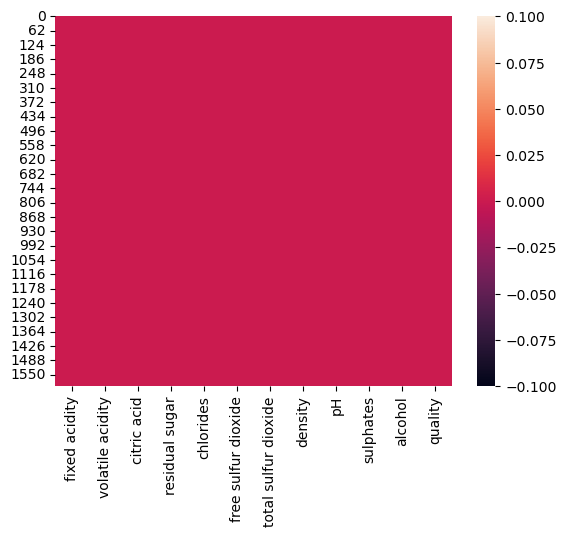

In [10]:
sns.heatmap(df.isnull())

There are no null values present in the dataset.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Here are a few more basic information of Dataset.
Shape - 1599 rows 12 columns
Missing values - 0
Different type of Datatypes - 2 (float64 & int64)
Range index - 0 to 1598(1599)
Memory usage - 150.0 KB


In [12]:
summary_stats = df.describe()
summary_stats

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


These statistics offer a comprehensive view of the dataset,the summary of dataset is:

1)Data Completeness: The dataset is complete with no missing values across all features, simplifying analysis.

2)Skewness: Most features are right-skewed, indicating a tendency toward higher values. For example, Residual Sugar, Chlorides, and Alcohol are positively skewed, while Density and pH are approximately symmetrical.

3)Outliers:

High Potential for Outliers: Features like Fixed Acidity, Volatile Acidity, Residual Sugar, and more have high potential for outliers with significantly higher maximum values compared to the 75th percentile.

Medium Potential for Outliers: Density exhibits a medium potential for outliers, with a slightly higher maximum compared to the 75th percentile.

No Potential for Outliers: Quality has no potential for outliers, as the maximum value matches the 75th percentile.

4)Data Variability: The standard deviation reflects the degree of data variation, and lower minimum values and 25th percentiles suggest relatively low data points.

In [13]:
# Checking For Unique values and White Spaces
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

In [14]:
df.nunique().to_frame('Number of Unique values in the Dataset:')

,Number of Unique values in the Dataset:
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


There is no whitespace in the dataset.
It displays the Unique values and  their respective number of occurrences in all columns of the Dataset.

In [15]:
df.duplicated().sum()

240

Their are multiple duplicate entries in the dataset but considering them as an individual feedback from customer which are same we will not drop it.

### Graphical Analysis

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


<Axes: xlabel='quality', ylabel='count'>

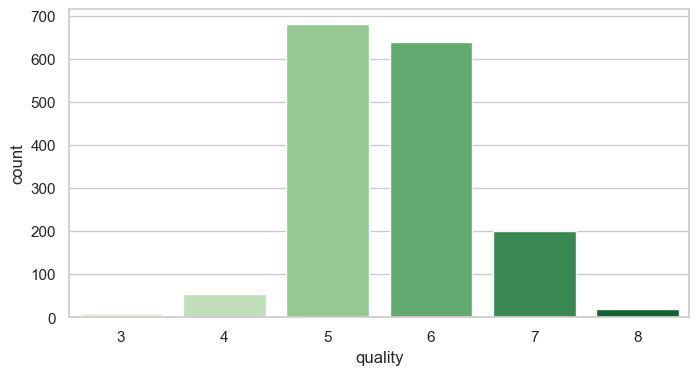

In [16]:
# plot value counts of quality column
sns.set(style="whitegrid")
print(df['quality'].value_counts())
fig = plt.figure(figsize=(8, 4))
sns.countplot(x='quality', data=df, palette='Greens')

We can observe that the count of 5 and 6 are much higher than 3,4 and 8 whereas higher than 7.Which leads to class imbalance issue in the data. We will rectify it using __ method in later part.

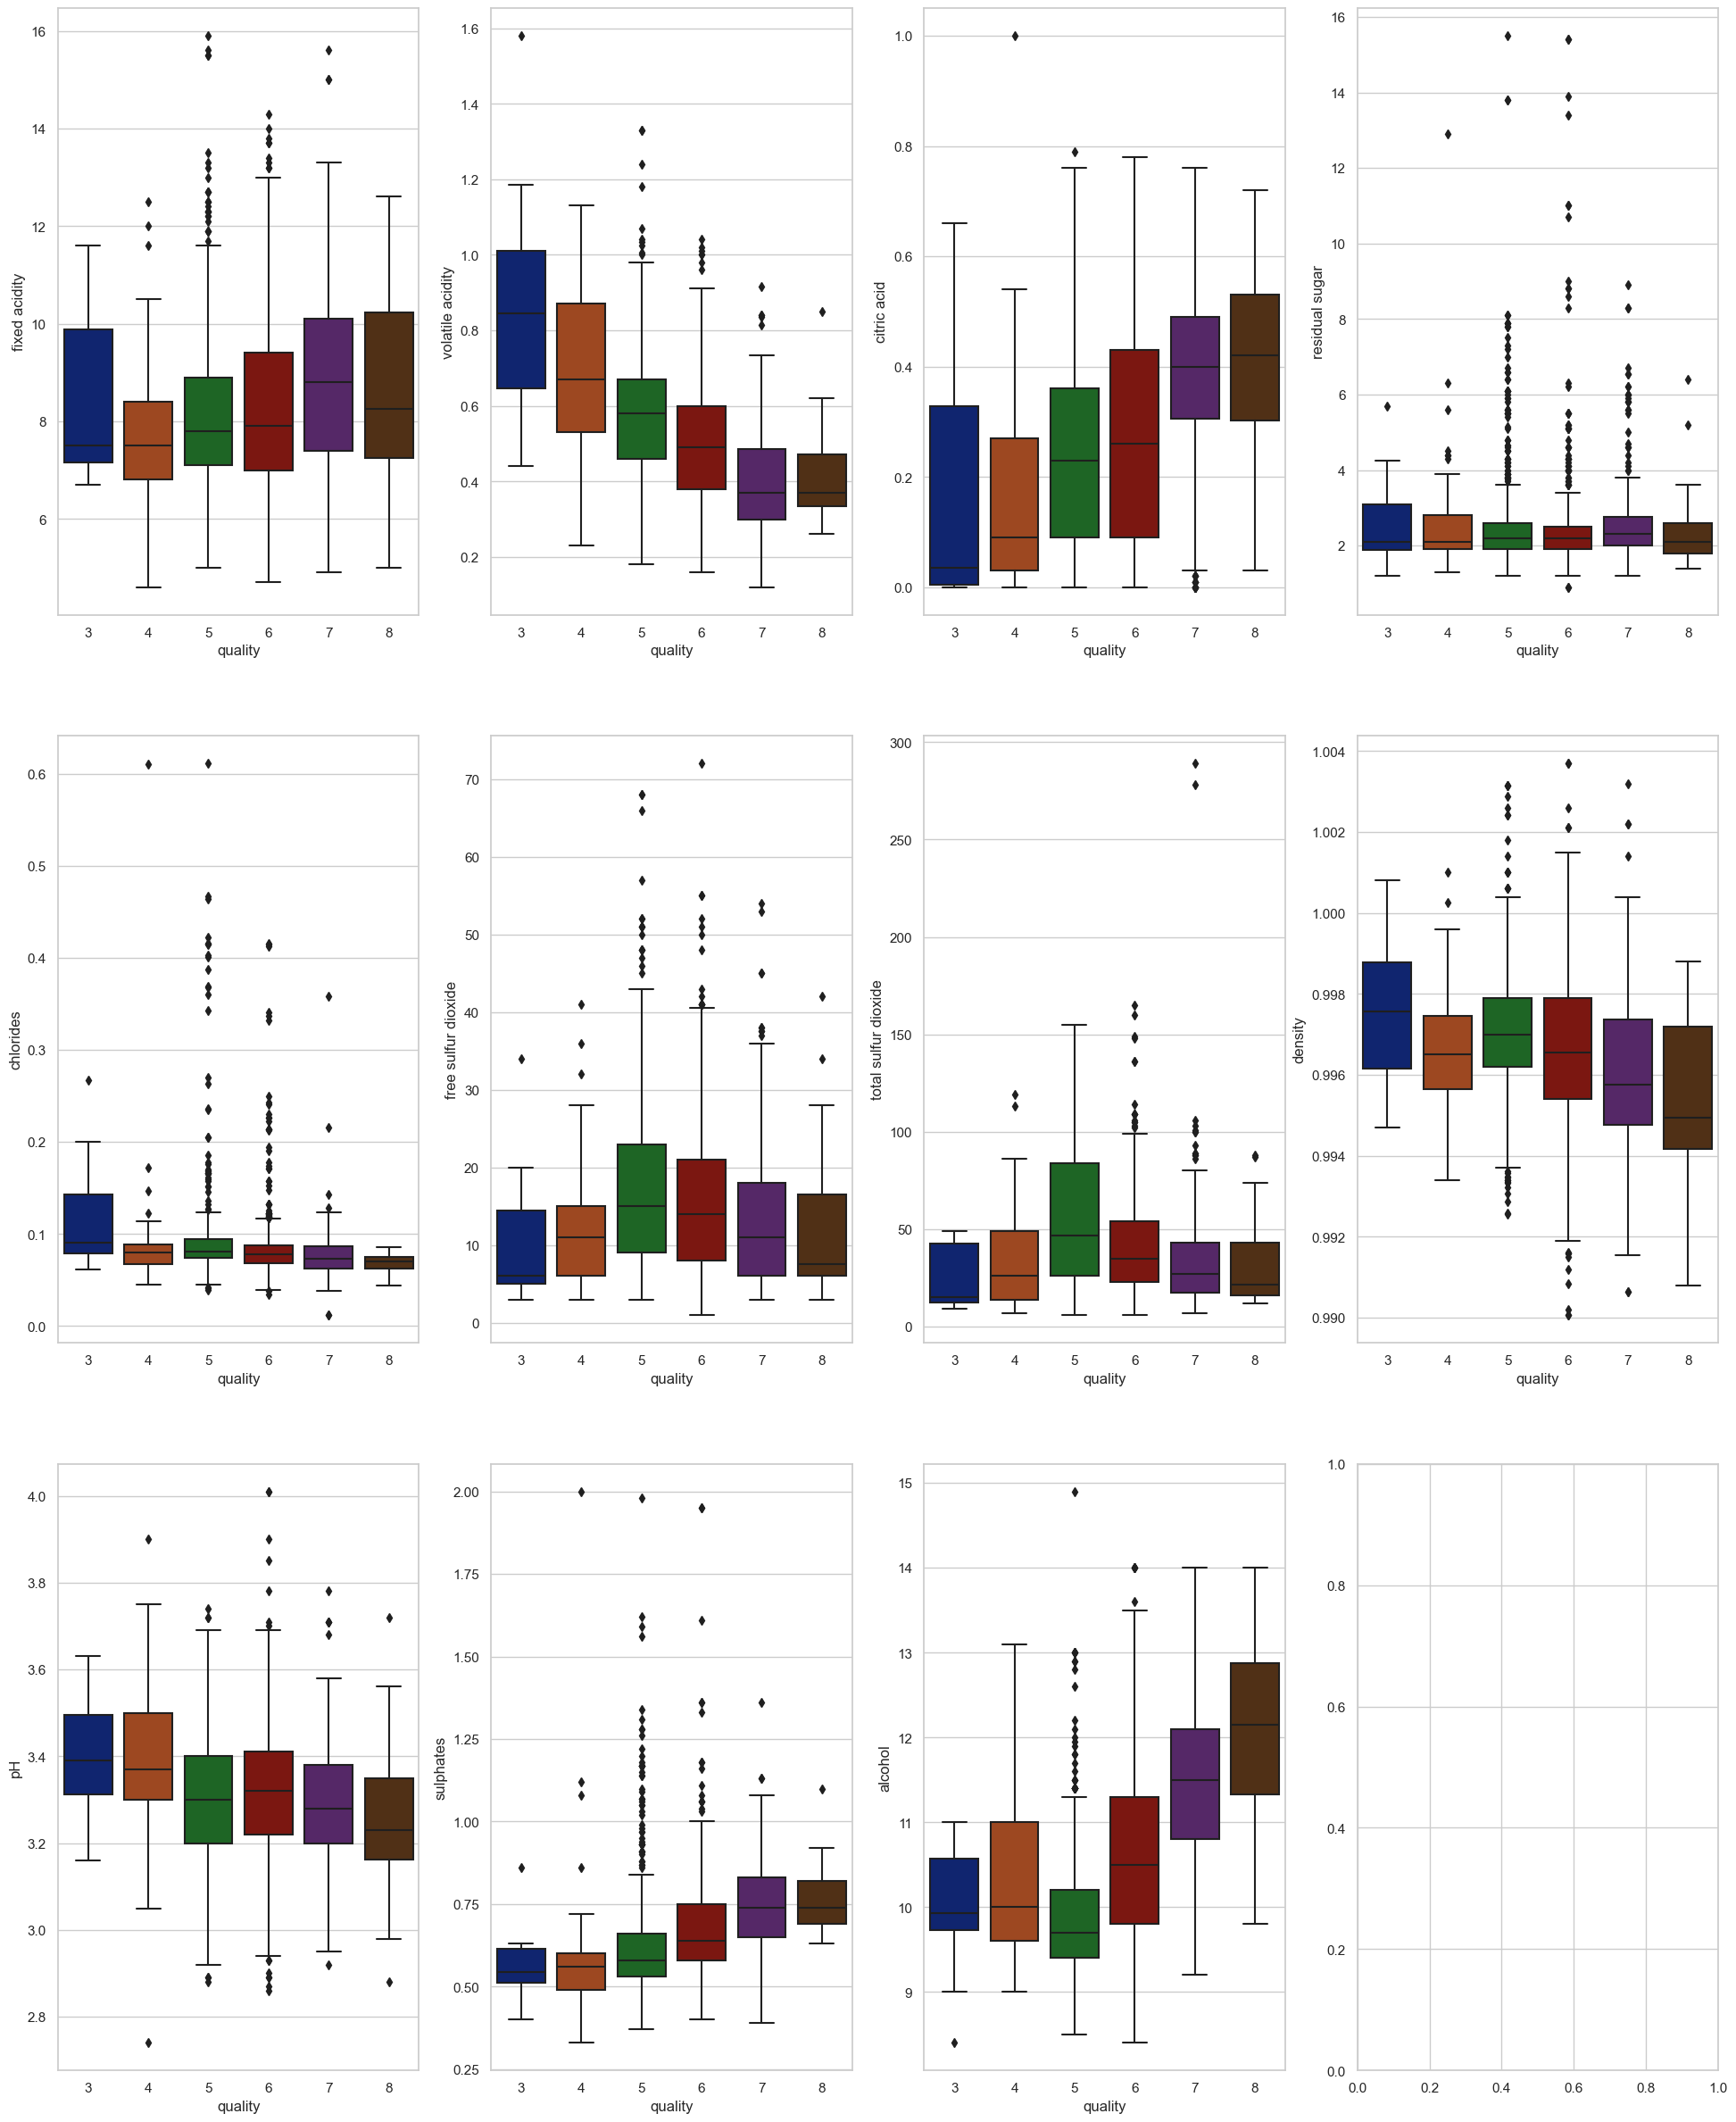

In [17]:
# Checking outliers
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 4, figsize=(24, 30))

for i, ax in enumerate(axes.flat):
    if i < len(df.columns) - 1:  # Exclude the 'quality' column
        sns.boxplot(x='quality', y=df.columns[i], data=df, ax=ax, palette='dark')

plt.show()

Here we can see almost all the parameters except citric acid contains a lot of outliers. We may have to do something about that if required.

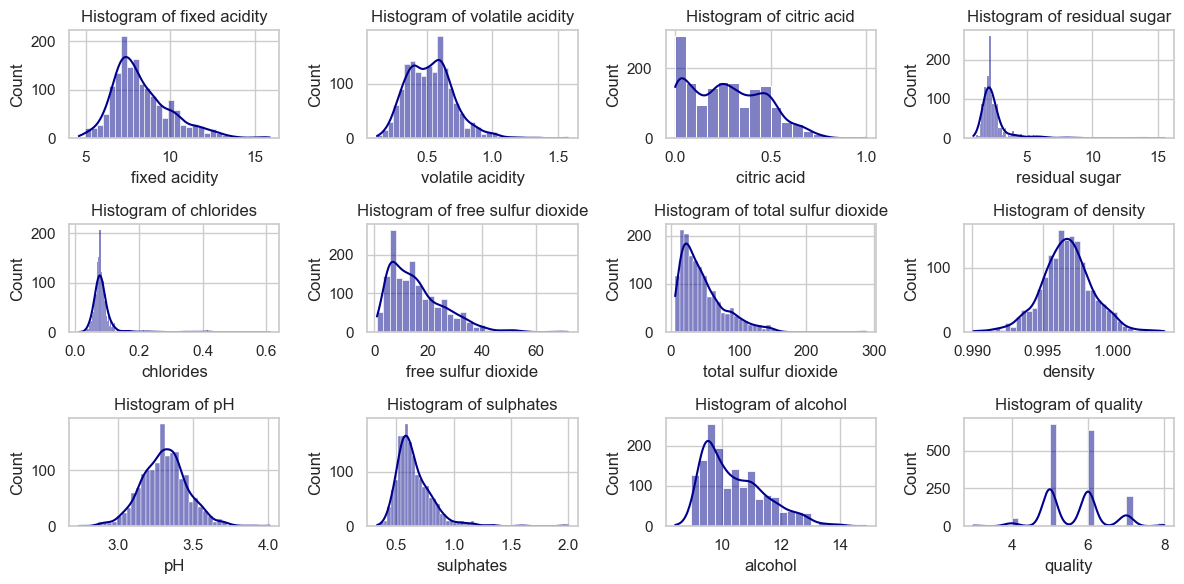

In [18]:
plt.figure(figsize=(12, 6))
for column in df.columns:
    plt.subplot(3, 4, df.columns.get_loc(column) + 1)
    sns.histplot(df[column], kde=True, color='darkblue' )
    plt.title(f'Histogram of {column}')
plt.tight_layout()

plt.show()

We can see from the above histogrames that some of our columns are highly skewed towards right, namely Residual Sugar, Chlorides, Free Sulphur Dioxide, Total Sulphur Dioxide, and Sulphates. To address this,we will apply a log transformation it will help rectify the skewness issue.

In [19]:
def log_transform(col):
    return np.log(col[0])

df['residual sugar'] = df[['residual sugar']].apply(log_transform, axis=1)
df['chlorides'] = df[['chlorides']].apply(log_transform, axis=1)
df['free sulfur dioxide'] = df[['free sulfur dioxide']].apply(log_transform, axis=1)
df['total sulfur dioxide'] = df[['total sulfur dioxide']].apply(log_transform, axis=1)
df['sulphates'] = df[['sulphates']].apply(log_transform, axis=1)

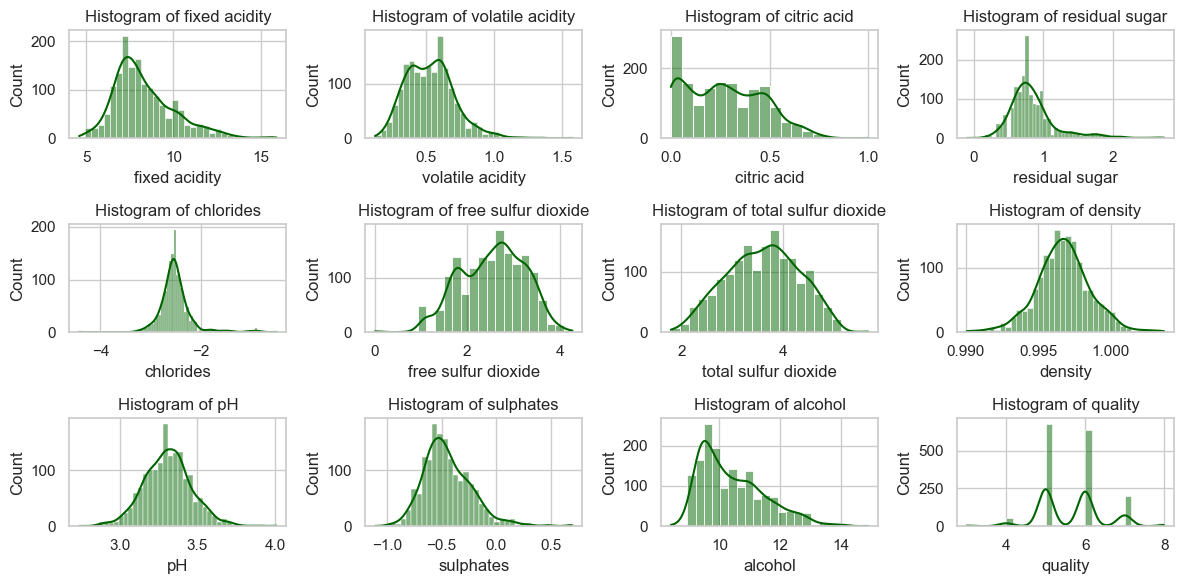

In [20]:
plt.figure(figsize=(12, 6))
for column in df.columns:
    plt.subplot(3, 4, df.columns.get_loc(column) + 1)
    sns.histplot(df[column], kde=True, color='darkgreen' )
    plt.title(f'Histogram of {column}')
plt.tight_layout()

plt.show()

We can see that the log transformation has effectively addressed the right-skewness issue in the columns. The data now displays a more symmetric and balanced distribution, enhancing its suitability for further analysis.

<Axes: >

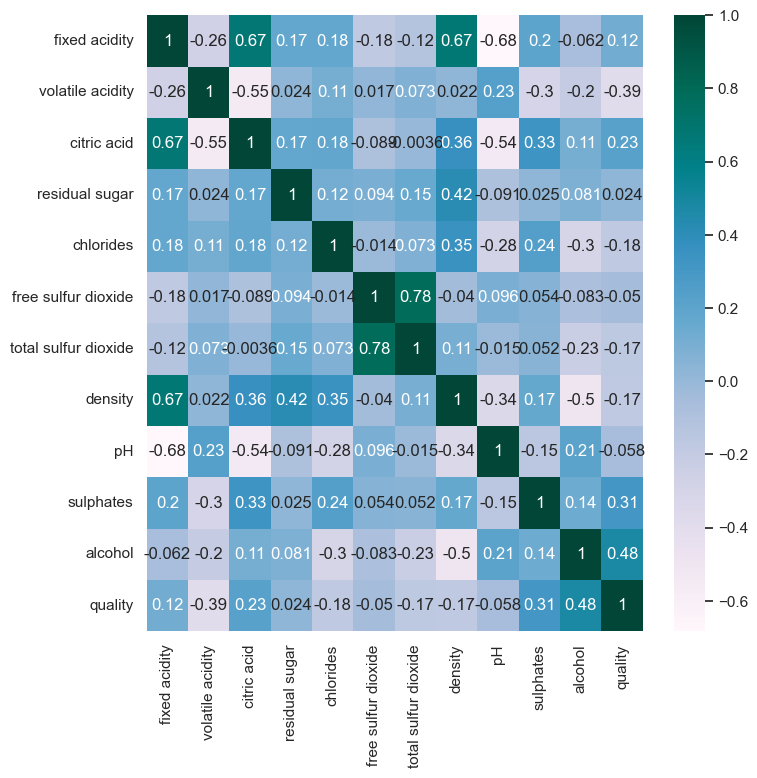

In [21]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(),annot=True, cmap= 'PuBuGn')

In [22]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.308642
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.023533
free sulfur dioxide    -0.050087
pH                     -0.057731
total sulfur dioxide   -0.170143
density                -0.174919
chlorides              -0.176140
volatile acidity       -0.390558
Name: quality, dtype: float64

The above correlation helps us understand the parameters that increase the quality i.e __parameters>0__ and
the parameters that decrease the quality __parameters<0__ .
for residual sugar correlation is almost zero and we can drop it

In [23]:
df = df.drop(columns=['residual sugar'])

## Balancing the data

In [24]:
from sklearn.utils import resample
df_3 = df[df.quality==3]     # MINORITY          
df_4 = df[df.quality==4]     # MINORITY          
df_5 = df[df.quality==5]     # MAJORITY
df_6 = df[df.quality==6]     # MAJORITY
df_7 = df[df.quality==7]     # MINORITY
df_8 = df[df.quality==8]     # MINORITY


In [25]:
# Oversample MINORITY Class to make balance data :
from sklearn.utils import resample

df_3_upsampled = resample(df_3, replace=True, n_samples=600, random_state=12) 
df_4_upsampled = resample(df_4, replace=True, n_samples=600, random_state=12) 
df_7_upsampled = resample(df_7, replace=True, n_samples=600, random_state=12) 
df_8_upsampled = resample(df_8, replace=True, n_samples=600, random_state=12) 

# Decreases the rows of Majority one's to make balance data :
df_5_downsampled = df[df.quality==5].sample(n=600).reset_index(drop=True)
df_6_downsampled = df[df.quality==6].sample(n=600).reset_index(drop=True)

In [26]:
# Combine downsampled majority class with upsampled minority class
Balanced_df = pd.concat([df_3_upsampled, df_4_upsampled, df_7_upsampled, 
                         df_8_upsampled, df_5_downsampled, df_6_downsampled]).reset_index(drop=True)
Balanced_df.quality.value_counts()      

3    600
4    600
7    600
8    600
5    600
6    600
Name: quality, dtype: int64

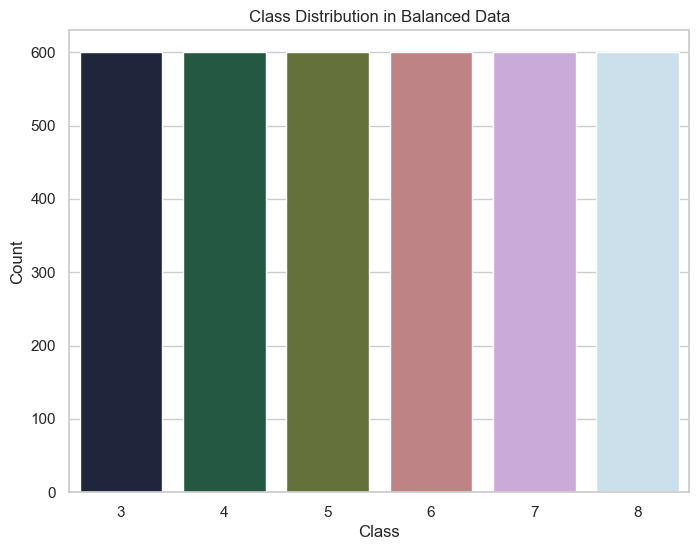

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns  

plt.figure(figsize=(8, 6))
sns.countplot(data=Balanced_df, x='quality', palette='cubehelix')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Balanced Data')
plt.show()

We can see all the classes in quality feature has been balanced.

In [28]:
# Setting Cut-off
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [29]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['quality'])
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

### Machine Learning Model

In [30]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=13)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=13)

In [31]:
# Trail 1
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 3, 5, 7],
    'min_samples_leaf': [1, 2, 3, 4]
}

grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best Decision Tree model
best_decision_tree = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_decision_tree.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
 
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

# Calculate ROC AUC on the test data
roc_auc = roc_auc_score(y_test, best_decision_tree.predict_proba(X_test)[:, 1])

print("ROC AUC:", roc_auc)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}
Accuracy: 0.8666666666666667
Confusion Matrix:
[[398  16]
 [ 48  18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       414
           1       0.53      0.27      0.36        66

    accuracy                           0.87       480
   macro avg       0.71      0.62      0.64       480
weighted avg       0.84      0.87      0.85       480

ROC AUC: 0.8085748792270533


Here we can see the Accuracy of model is 87% and the ROc Auc is 82% , Lets try changing hyperparameters and see result.

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.8520833333333333
Confusion Matrix:
[[376  38]
 [ 33  33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       414
           1       0.46      0.50      0.48        66

    accuracy                           0.85       480
   macro avg       0.69      0.70      0.70       480
weighted avg       0.86      0.85      0.85       480

ROC AUC: 0.8473137168789342


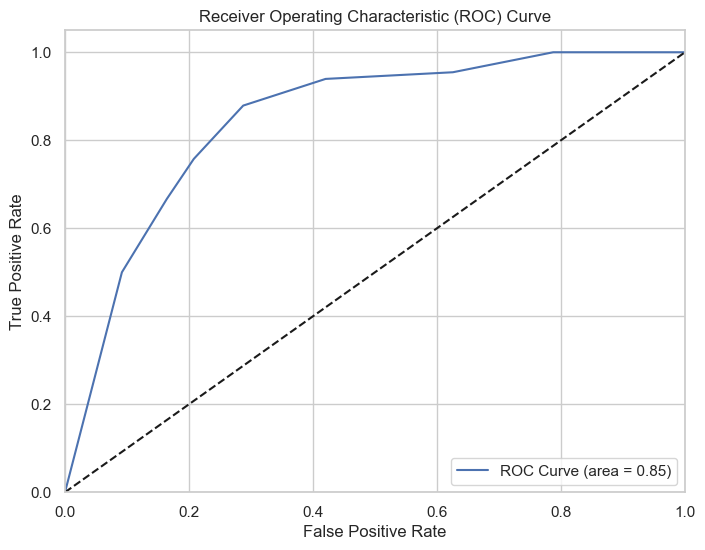

Top 10 Important Features:
                Feature  Importance
9               alcohol    0.704856
1      volatile acidity    0.171565
8             sulphates    0.103885
5  total sulfur dioxide    0.019694
0         fixed acidity    0.000000
2           citric acid    0.000000
3             chlorides    0.000000
4   free sulfur dioxide    0.000000
6               density    0.000000
7                    pH    0.000000


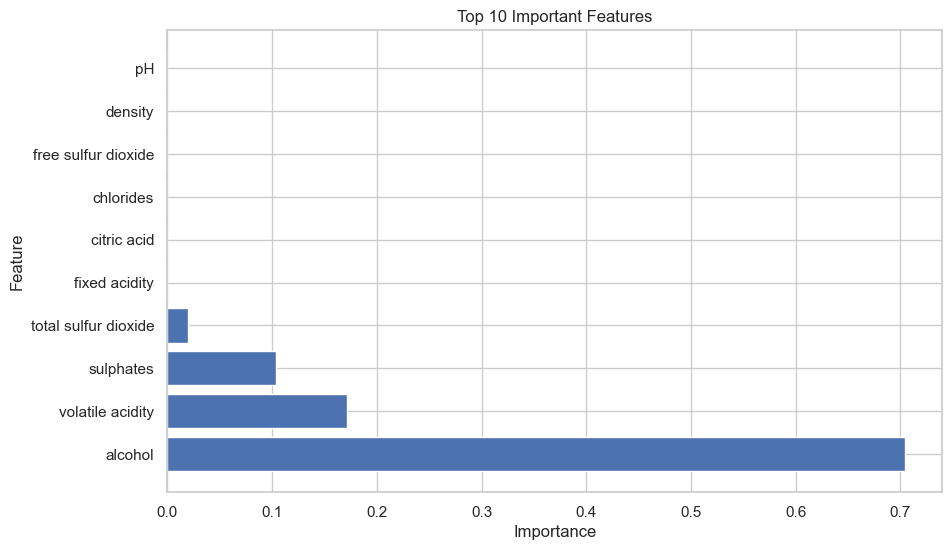

In [32]:
# Trail 2
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 6, 9, 12],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Create a Grid Search CV object
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best Decision Tree model
best_decision_tree = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_decision_tree.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

# Calculate ROC AUC on the test data
roc_auc = roc_auc_score(y_test, best_decision_tree.predict_proba(X_test)[:, 1])

print("ROC AUC:", roc_auc)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Calculate ROC AUC on the test data
y_pred_prob = best_decision_tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Analyze feature importance from the best Decision Tree model
feature_importance = best_decision_tree.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

N = 10
print("Top {} Important Features:".format(N))
print(feature_importance_df.head(N))

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:N], feature_importance_df['Importance'][:N])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top {} Important Features'.format(N))
plt.show()

# Conclusion

__1) Machine Learning Success:__ This project effectively applied machine learning to identify the key physicochemical properties that define whether a red Vinho Verde wine is "good" or not.

__2) Model Performance:__ The decision tree model, with optimized hyperparameters, achieved a commendable accuracy of 85.21% and a robust ROC AUC of 0.8473.

__3) Key Feature:__ Alcohol Content: The analysis revealed that "alcohol content" is the most influential factor in wine quality, with a strong positive correlation. Higher alcohol content tends to be associated with better wine quality.

__4) Other Influential Features:__ Besides alcohol, "volatile acidity" and "sulphates" were also identified as significant contributors to wine quality.

__5) Future Enhancements:__ The dataset contains class imbalance, with more "not good" wines than "good" ones, which could affect the model's performance.To further improve the model, future work might include experimenting with different machine learning algorithms, addressing class imbalance by gathering additional data.

__6) Practical Insights:__ The project offers valuable insights for wine producers and enthusiasts seeking to enhance the quality of red Vinho Verde wine, underlining the potential of machine learning in this domain.

# Thank-you!